In [ ]:
import os

In [ ]:
data_dir = '/content/cell_images'

In [ ]:
os.listdir(data_dir)

['train', 'test']

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [ ]:
from matplotlib.image import imread

In [ ]:
test_path = data_dir+'/test'
train_path = data_dir+'/train'

In [ ]:
test_path

'/content/cell_images/test'

In [ ]:
os.listdir(test_path)

['uninfected', 'parasitized']

In [ ]:
os.listdir(train_path)

['uninfected', 'parasitized']

In [ ]:
os.listdir(train_path+'/parasitized')[0]

'C96P57ThinF_IMG_20150824_105531_cell_218.png'

In [ ]:
para_cell = train_path+'/parasitized/' +'C96P57ThinF_IMG_20150824_105531_cell_218.png'

In [ ]:
para_cell

'/content/cell_images/train/parasitized/C96P57ThinF_IMG_20150824_105531_cell_218.png'

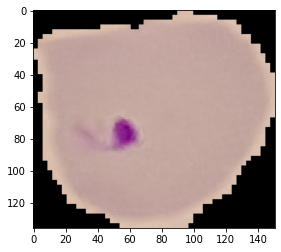

In [ ]:
plt.imshow(imread(para_cell))

In [ ]:
os.listdir(train_path+'/uninfected')[0]

'C176P137NThinF_IMG_20151201_121808_cell_70.png'

In [ ]:
uni_cell = train_path+'/uninfected'+'/C176P137NThinF_IMG_20151201_121808_cell_70.png'

In [ ]:
uni_cell.shape

(163, 145, 3)

In [ ]:
uni_cell = imread(uni_cell)

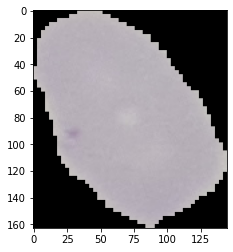

In [ ]:
plt.imshow(uni_cell)

In [ ]:
#len(os.listdir(train_path+'/parasitized'))

In [ ]:
#len(os.listdir(train_path+'/uninfected'))

In [ ]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path+'/uninfected'):

  img = imread(test_path+'/uninfected/'+image_filename)
  d1, d2, colors = img.shape
  dim1.append(d1)
  dim2.append(d2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


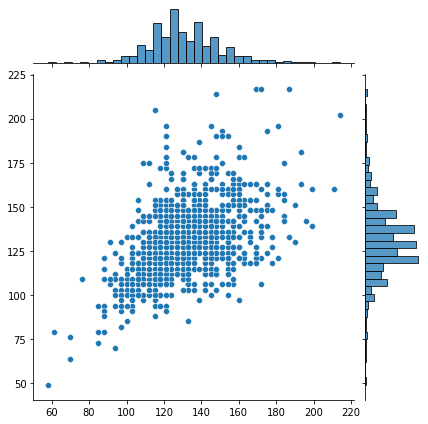

In [ ]:
sns.jointplot(dim1, dim2)

In [ ]:
np.mean(dim1)

130.92538461538462

In [ ]:
np.mean(dim2)

130.75

In [ ]:
image_shape = (130, 130, 3)

In [ ]:
130*130*3 

50700

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_gen = ImageDataGenerator(rotation_range = 20, 
                               width_shift_range=0.1,
                               height_shift_range=0.1, 
                               shear_range = 0.1, 
                               zoom_range = 0.1, 
                               horizontal_flip = True, 
                               fill_mode = 'nearest')

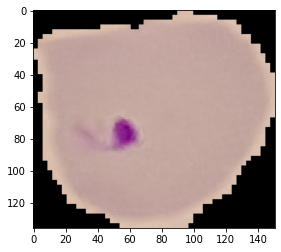

In [ ]:
para_img = imread(para_cell)
plt.imshow(para_img)

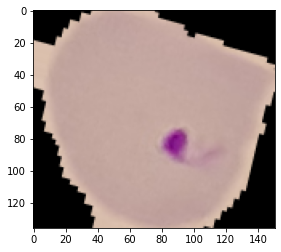

In [ ]:
plt.imshow(image_gen.random_transform(para_img))

In [ ]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [ ]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential 

In [ ]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = image_shape, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = image_shape, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = image_shape, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid'))


model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 64)      

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)

In [ ]:
batch_size = 16

In [ ]:
train_image_gen = image_gen.flow_from_directory(train_path, 
                                                target_size=image_shape[:2] , 
                                                color_mode = 'rgb',
                                                batch_size = batch_size,
                                                class_mode = 'binary')      

Found 24958 images belonging to 2 classes.


In [ ]:
test_image_gen = image_gen.flow_from_directory(test_path, 
                                                target_size=image_shape[:2] , 
                                                color_mode = 'rgb',
                                                batch_size = batch_size,
                                                class_mode = 'binary', 
                                                shuffle = False)      

Found 2600 images belonging to 2 classes.


In [ ]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [ ]:
#results = model.fit_generator(train_image, epochs = 20,
#                              validation_data = test_image_gen, 
#                             callbacks = [early_stop])

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model = load_model('malaria_detector.h5')# will not show history.history 

In [ ]:
pred = model.predict_generator(test_image_gen) # actually probability values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
predictions = pred>0.5

In [ ]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

In [ ]:
len(pred)

2600

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
print(classification_report(test_image_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1300
           1       0.97      0.77      0.86      1300

    accuracy                           0.88      2600
   macro avg       0.89      0.88      0.88      2600
weighted avg       0.89      0.88      0.88      2600



In [ ]:
confusion_matrix(test_image_gen.classes, predictions)

array([[1272,   28],
       [ 293, 1007]])

In [ ]:
para_cell

'/content/cell_images/train/parasitized/C96P57ThinF_IMG_20150824_105531_cell_218.png'

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
my_image = image.load_img(para_cell, target_size=image_shape)

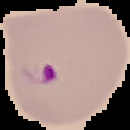

In [ ]:
my_image

In [ ]:
#model.summary()

In [ ]:
my_image_arr = image.img_to_array(my_image)

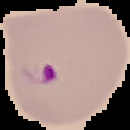

In [ ]:
my_image

In [ ]:
my_image_arr.shape # want it to be (1,130,130,3)

(130, 130, 3)

In [ ]:
my_image_arr = np.expand_dims(my_image_arr, axis = 0)

In [ ]:
my_image_arr.shape

(1, 130, 130, 3)

In [ ]:
model.predict(my_image_arr)

array([[0.]], dtype=float32)

In [ ]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}